In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
import os
print(os.listdir("/kaggle/input"))


['credit-card-fraud-detection-dataset-2023']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


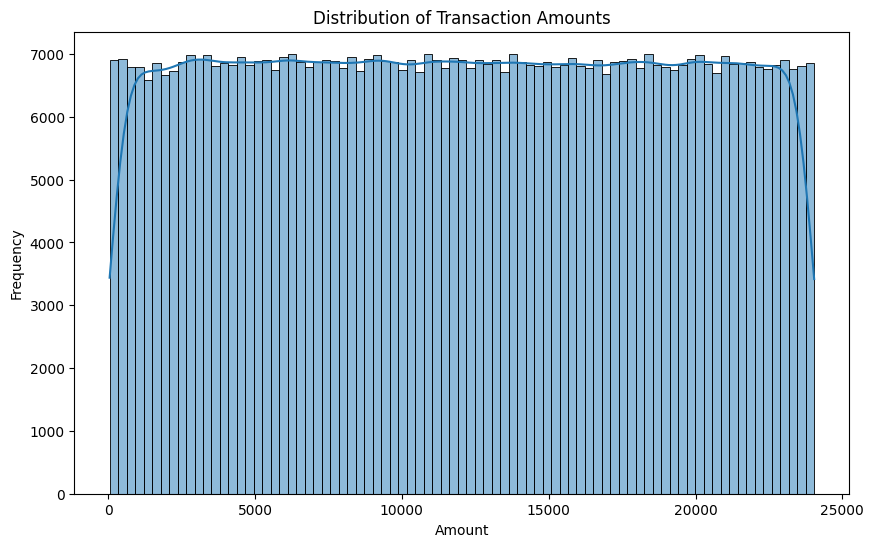

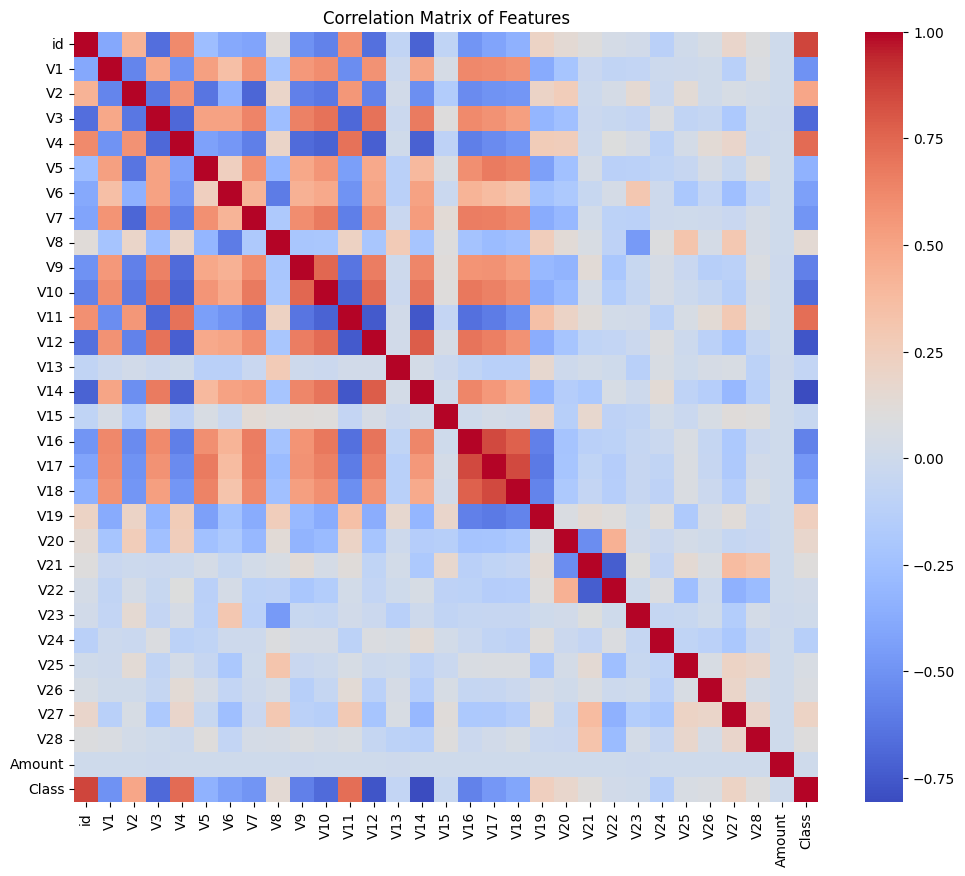

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

# Display basic information about the dataset
print(data.info())

# Check class distribution
print(data['Class'].value_counts(normalize=True))

# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(['Class', 'id'], axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Shape of scaled features:", X_scaled.shape)
print("\nFirst 5 rows of scaled features:")
print(X_scaled_df.head())

print("\nSummary statistics of scaled features:")
print(X_scaled_df.describe())


Shape of scaled features: (568630, 29)

First 5 rows of scaled features:
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -0.214048   
4 -0.212660  1.049921  0.968046  ...  0.247237 -0.106984  0.729727 -0.161666

**STEP 3 MODEL SELECTION AND TRAINING**

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5678
           1       1.00      0.97      0.98      5695

    accuracy                           0.98     11373
   macro avg       0.98      0.98      0.98     11373
weighted avg       0.98      0.98      0.98     11373



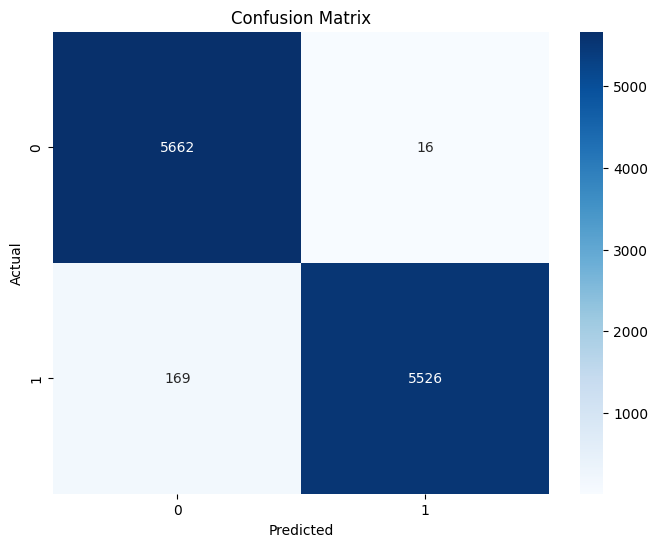


ROC AUC Score: 0.9989553970610656


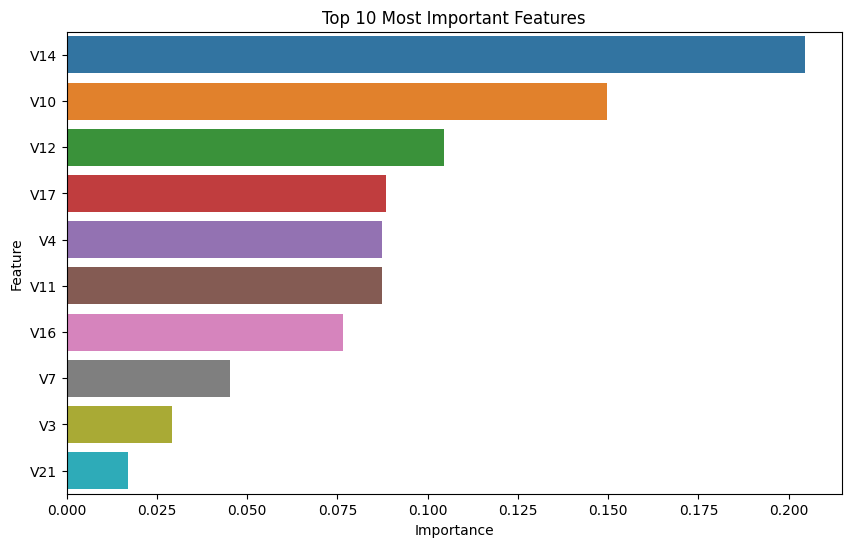

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load a subset of the data (e.g., 10% of the original dataset)
data = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")
data_subset = data.sample(frac=0.1, random_state=42)

# Separate features and target
X = data_subset.drop(['Class', 'id'], axis=1)
y = data_subset['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model with optimized parameters
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

# Separate features and target
X = data.drop(['Class', 'id'], axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)


Shape of training set: (454904, 29)
Shape of testing set: (113726, 29)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.98     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



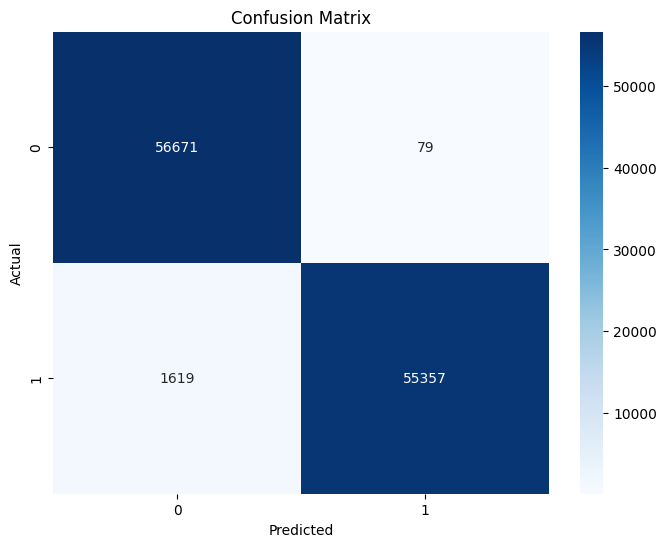


ROC AUC Score: 0.9994436249222177


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc}")


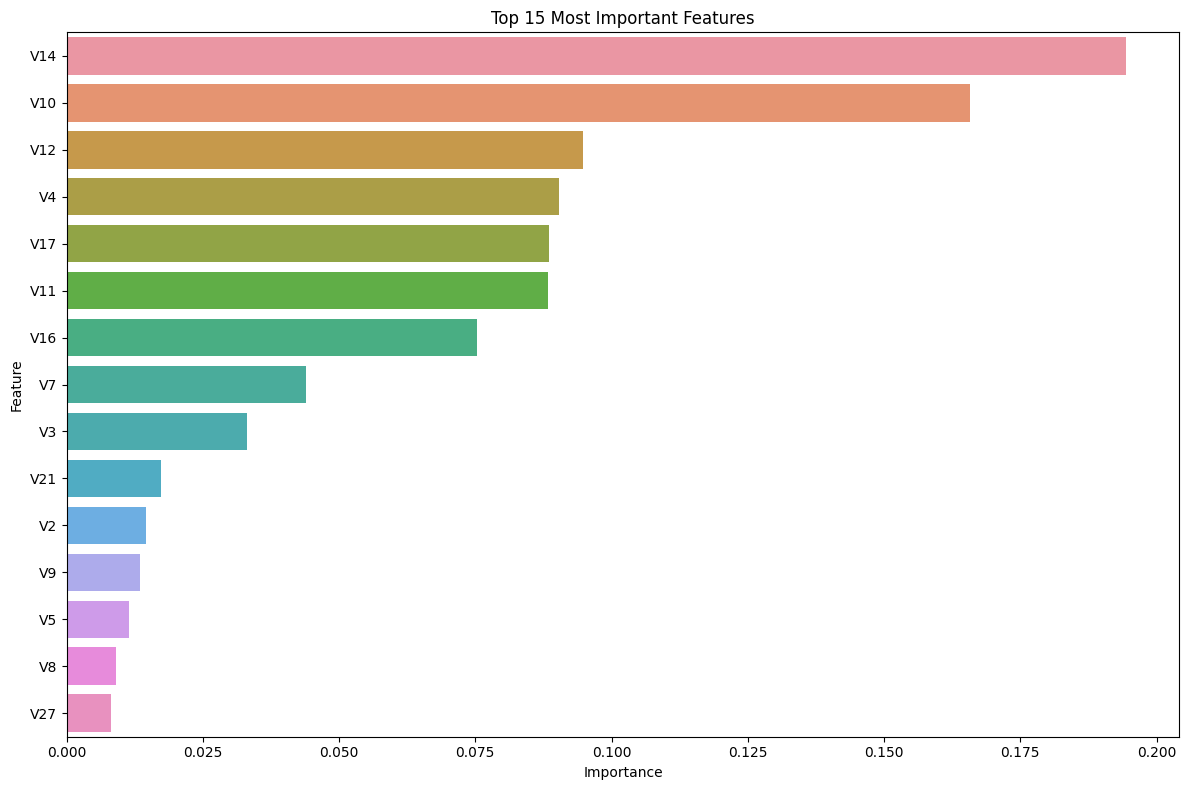

   feature  importance
13     V14    0.194479
9      V10    0.165797
11     V12    0.094772
3       V4    0.090350
16     V17    0.088615
10     V11    0.088328
15     V16    0.075283
6       V7    0.043905
2       V3    0.033128
20     V21    0.017314
1       V2    0.014579
8       V9    0.013477
4       V5    0.011509
7       V8    0.009073
26     V27    0.008225


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print(feature_importance.head(15))


In [10]:
import pandas as pd
import numpy as np

# Get predictions
y_pred = rf_model.predict(X_test)

# Find misclassified instances
misclassified = X_test[y_test != y_pred].copy()
misclassified['Actual'] = y_test[y_test != y_pred]
misclassified['Predicted'] = y_pred[y_test != y_pred]

# Display a few misclassified instances
print("Sample of Misclassified Instances:")
print(misclassified.head())

# Calculate and display error rates
error_rates = pd.DataFrame({
    'Actual': y_test[y_test != y_pred],
    'Predicted': y_pred[y_test != y_pred]
}).groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

print("\nError Rates:")
print(error_rates)


Sample of Misclassified Instances:
              V1        V2        V3        V4        V5        V6        V7  \
525933  0.924501 -0.290777  0.656590  0.071806  0.289813  0.505676  0.436623   
521633 -0.090983 -0.186517  0.819777 -0.654612  0.040590  0.052266  0.624355   
496293  0.138427 -0.443978  0.046585 -0.647375  0.920195 -0.103468  0.496581   
505773 -0.363227 -0.392430  1.241094 -0.806932  0.287632 -0.245393  0.545337   
523533  0.988290 -0.648032  0.356004 -0.772565  0.077467  0.316371  0.300437   

              V8        V9       V10  ...       V22       V23       V24  \
525933 -0.124480  0.174102  0.676523  ... -0.257910 -0.005577  0.131352   
521633 -0.116870  0.333619  0.156383  ...  0.229253 -0.105016  0.852565   
496293 -0.255581  0.676987  0.611398  ...  0.663922  0.140493  1.484629   
505773 -0.182185  1.073860  0.564048  ...  0.062248  0.619276  0.842111   
523533 -0.149869  0.164571  0.648532  ... -0.397805 -0.197024 -0.861947   

             V25       V26       

In [11]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Apply the new threshold
y_pred_new = (y_pred_proba >= optimal_threshold).astype(int)

# Print new classification report
from sklearn.metrics import classification_report
print("\nNew Classification Report:")
print(classification_report(y_test, y_pred_new))


Optimal Threshold: 0.3589870013912854

New Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56750
           1       0.99      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



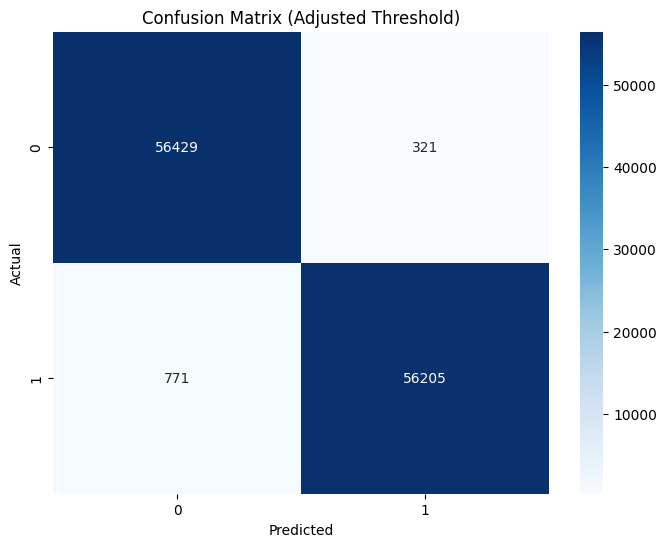


Error Rates:
False Negatives: 771
False Positives: 321


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm_new = confusion_matrix(y_test, y_pred_new)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Adjusted Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print error rates
print("\nError Rates:")
print(f"False Negatives: {cm_new[1,0]}")
print(f"False Positives: {cm_new[0,1]}")


In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use a smaller subset of the data (e.g., 10%)
X_sample = X.sample(frac=0.1, random_state=42)
y_sample = y[X_sample.index]

# Create a simpler Random Forest model for cross-validation
rf_model_cv = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

# Perform k-fold cross-validation with fewer folds
cv_scores = cross_val_score(rf_model_cv, X_sample, y_sample, cv=3, scoring='roc_auc', n_jobs=-1)

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.9863383  0.98844612 0.98898867]
Mean ROC AUC Score: 0.9879243606384737


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
lr_roc_auc = roc_auc_score(y_test, lr_proba)

# Print results
print("Logistic Regression ROC AUC Score:", lr_roc_auc)
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression ROC AUC Score: 0.9909800790996937

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report

# Step 1.1: Downsample non-fraud to 1% fraud ratio
# Separate fraud and non-fraud cases
fraud = data[data['Class'] == 1]  # 284,315 fraud cases
non_fraud = data[data['Class'] == 0]  # 284,315 non-fraud cases

# Downsample non-fraud to achieve 1% fraud ratio
# Fraud cases: 284,315; Non-fraud cases: 284,315 / 99 = 2,843 (approx.)
non_fraud_downsampled = resample(non_fraud, 
                                 replace=False, 
                                 n_samples=int(len(fraud) / 99), 
                                 random_state=42)

# Combine to create imbalanced dataset
data_imbalanced = pd.concat([fraud, non_fraud_downsampled])

# Verify class distribution
print("Class distribution after downsampling:")
print(data_imbalanced['Class'].value_counts(normalize=True))
# Expected: ~99% fraud (Class=1), ~1% non-fraud (Class=0)

# Step 1.2: Re-split the imbalanced dataset
X = data_imbalanced.drop(['id', 'Class'], axis=1)  # Features: V1-V28, Amount
y = data_imbalanced['Class']  # Target: Class (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
# Expected: ~229,726 train, ~57,432 test

# Step 1.3: Re-train models on imbalanced data
# Random Forest (same parameters as before for now)
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Step 1.4: Evaluate with PR-AUC and classification report
# Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"Random Forest PR-AUC: {pr_auc_rf}")

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Logistic Regression
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
print(f"Logistic Regression PR-AUC: {pr_auc_lr}")

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Class distribution after downsampling:
Class
1    0.990003
0    0.009997
Name: proportion, dtype: float64
Training set size: 229748
Test set size: 57438
Random Forest PR-AUC: 0.9999176276900895
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55       574
           1       0.99      1.00      1.00     56864

    accuracy                           0.99     57438
   macro avg       1.00      0.69      0.77     57438
weighted avg       0.99      0.99      0.99     57438

Logistic Regression PR-AUC: 0.9998797476761281
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.57      0.72       574
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     57438
   macro avg       0.98      0.78      0.86     57438
weighted avg       1.00      1.00      0.99     57438



In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report

# Load the dataset
# Adjust the file path based on your Kaggle dataset name
# Check /kaggle/input/ for the exact file name if needed
data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

# Verify the dataset loaded correctly
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# Step 1.1: Downsample non-fraud to 1% fraud ratio
# Separate fraud and non-fraud cases
fraud = data[data['Class'] == 1]  # 284,315 fraud cases
non_fraud = data[data['Class'] == 0]  # 284,315 non-fraud cases

# Downsample non-fraud to achieve 1% fraud ratio
# Fraud cases: 284,315; Non-fraud cases: 284,315 / 99 = 2,843 (approx.)
non_fraud_downsampled = resample(non_fraud, 
                                 replace=False, 
                                 n_samples=int(len(fraud) / 99), 
                                 random_state=42)

# Combine to create imbalanced dataset
data_imbalanced = pd.concat([fraud, non_fraud_downsampled])

# Verify class distribution
print("\nClass distribution after downsampling:")
print(data_imbalanced['Class'].value_counts(normalize=True))

# Step 1.2: Re-split the imbalanced dataset
X = data_imbalanced.drop(['id', 'Class'], axis=1)  # Features: V1-V28, Amount
y = data_imbalanced['Class']  # Target: Class (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify split sizes
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 1.3: Re-train models on imbalanced data
# Random Forest (same parameters as before for now)
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Step 1.4: Evaluate with PR-AUC and classification report
# Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"\nRandom Forest PR-AUC: {pr_auc_rf}")

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Logistic Regression
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
print(f"Logistic Regression PR-AUC: {pr_auc_lr}")

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report

# Load the dataset (already done, but included for completeness)
data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

# Step 1.1: Downsample fraud to 1% fraud ratio
# Separate fraud and non-fraud cases
fraud = data[data['Class'] == 1]  # 284,315 fraud cases
non_fraud = data[data['Class'] == 0]  # 284,315 non-fraud cases

# Downsample fraud to achieve 1% fraud ratio
# Non-fraud cases: 284,315; Fraud cases: 284,315 / 99 = 2,873 (approx.)
fraud_downsampled = resample(fraud, 
                             replace=False, 
                             n_samples=int(len(non_fraud) / 99), 
                             random_state=42)

# Combine to create imbalanced dataset
data_imbalanced = pd.concat([fraud_downsampled, non_fraud])

# Verify class distribution
print("Class distribution after downsampling:")
print(data_imbalanced['Class'].value_counts(normalize=True))

# Step 1.2: Re-split the imbalanced dataset
X = data_imbalanced.drop(['id', 'Class'], axis=1)  # Features: V1-V28, Amount
y = data_imbalanced['Class']  # Target: Class (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify split sizes
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 1.3: Re-train models on imbalanced data
# Random Forest (same parameters as before for now)
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Step 1.4: Evaluate with PR-AUC and classification report
# Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"\nRandom Forest PR-AUC: {pr_auc_rf}")

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Logistic Regression
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
print(f"Logistic Regression PR-AUC: {pr_auc_lr}")

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Class distribution after downsampling:
Class
0    0.990003
1    0.009997
Name: proportion, dtype: float64

Training set size: 229748
Test set size: 57438

Random Forest PR-AUC: 0.8712089247485134
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86       574

    accuracy                           1.00     57438
   macro avg       0.98      0.90      0.93     57438
weighted avg       1.00      1.00      1.00     57438

Logistic Regression PR-AUC: 0.8904670809342009
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87       574

    accuracy                           1.00     57438
   macro avg       0.97      0.91      0.94     57438
weighted avg       1.00      1.00      1.00     57438



# **Optimize the Random Forest model for recall.**

In [18]:
# Import necessary libraries (already imported in Step 1, included for completeness)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, classification_report, precision_recall_curve, auc
import numpy as np

# Step 2.1: Tune Random Forest with class weights
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Step 2.2: Optimize decision threshold for higher recall
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for Class=1 (fraud)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Find threshold that achieves recall >0.95 with reasonable precision (>0.5)
thresholds = np.append(thresholds, 1.0)  # Include threshold=1.0 for edge case
best_recall = 0
best_threshold = 0.5
best_precision = 0
for thresh in thresholds:
    y_pred = (y_proba_rf >= thresh).astype(int)
    recall_val = recall_score(y_test, y_pred, pos_label=1)  # Recall for fraud (Class=1)
    precision_val = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  # Precision for fraud (Class=1)
    if recall_val >= 0.95 and precision_val >= 0.5 and recall_val > best_recall:
        best_recall = recall_val
        best_threshold = thresh
        best_precision = precision_val

print(f"Best Threshold: {best_threshold}")
print(f"Best Recall for Fraud: {best_recall}")
print(f"Precision at Best Threshold: {best_precision}")

# Step 2.3: Re-evaluate with the best threshold
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)
print("\nRandom Forest Classification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_rf))

# Step 2.4: Calculate PR-AUC (using precision and recall from precision_recall_curve)
pr_auc_rf = auc(recall, precision)
print(f"Random Forest PR-AUC (Optimized): {pr_auc_rf}")

# Step 2.5: Calculate false negatives for fraud (Class=1)
false_negatives = sum((y_test == 1) & (y_pred_rf == 0))
print(f"False Negatives for Fraud: {false_negatives}")

Best Threshold: 0.03
Best Recall for Fraud: 0.9930313588850174
Precision at Best Threshold: 0.6705882352941176

Random Forest Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.99      0.80       574

    accuracy                           1.00     57438
   macro avg       0.84      0.99      0.90     57438
weighted avg       1.00      1.00      1.00     57438

Random Forest PR-AUC (Optimized): 0.9862089757682776
False Negatives for Fraud: 4


# **Add Explainability with SHAP and BERT**

In [19]:
# Step 3.1: Install SHAP and Transformers (if not already installed)
!pip install shap transformers

# Import necessary libraries
import shap
import numpy as np
from transformers import pipeline

# Step 3.2: Use SHAP to identify key features
# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
# Use a subset of X_test to speed up computation (e.g., 1000 samples)
X_test_subset = X_test.sample(n=1000, random_state=42)
shap_values = explainer.shap_values(X_test_subset)

# SHAP values for Class=1 (fraud)
shap_values_fraud = shap_values[1]  # shap_values[0] is for Class=0, shap_values[1] is for Class=1

# Step 3.3: Integrate BERT for explanations
# Load BERT for text generation (proxy for LLaMA)
# Note: Kaggle may require internet for downloading the model; if internet is disabled, use a pre-downloaded model
try:
    llm = pipeline("text-generation", model="bert-base-uncased", device=-1)  # device=-1 for CPU
except Exception as e:
    print(f"Error loading BERT: {e}")
    print("Falling back to a simpler explanation method.")

# Step 3.4: Output predictions with explanations for flagged transactions
# Get predictions and probabilities for the full test set
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)

# Loop through a few flagged transactions (e.g., first 5 fraud predictions)
flagged_indices = np.where(y_pred_rf == 1)[0][:5]  # First 5 predicted fraud cases
for idx in flagged_indices:
    # Get the transaction's features
    transaction = X_test.iloc[idx]
    # Get SHAP values for this transaction (recompute for the specific sample)
    shap_value = explainer.shap_values(transaction.values.reshape(1, -1))[1][0]  # For Class=1
    # Identify top 3 features contributing to the fraud prediction
    top_features_idx = np.argsort(np.abs(shap_value))[-3:]  # Top 3 features by absolute SHAP value
    top_features = X_test.columns[top_features_idx]
    top_values = transaction[top_features]
    # Format the explanation
    prompt = f"This transaction was flagged as fraud due to: {', '.join([f'high {feat}' for feat in top_features])}. Explain why these features indicate fraud."
    try:
        explanation = llm(prompt, max_length=50, num_return_sequences=1)[0]['generated_text']
    except:
        # Fallback if BERT fails (e.g., due to internet or model issues)
        explanation = f"High values in {', '.join(top_features)} often indicate unusual patterns, such as large transactions or suspicious behavior."
    
    # Output the result
    print(f"\nTransaction {idx}:")
    print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
    print(f"Prediction: Fraud (Class=1)")
    print(f"Top Features: {list(zip(top_features, top_values))}")
    print(f"Explanation: {explanation}")

Error loading BERT: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like bert-base-uncased is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.
Falling back to a simpler explanation method.

Transaction 6:
Predicted Probability of Fraud: 0.030
Prediction: Fraud (Class=1)
Top Features: [('V12', 0.5078760279670679), ('V11', -1.2891461117311125), ('V14', 1.443803040392684)]
Explanation: High values in V12, V11, V14 often indicate unusual patterns, such as large transactions or suspicious behavior.

Transaction 57:
Predicted Probability of Fraud: 0.170
Prediction: Fraud (Class=1)
Top Features: [('V10', -0.0341661718700925), ('V14', 0.6898747881796575), ('V11', -1.1283147196576142)]
Explanation: High values in V10, V14, V11 often indicate unusual patterns, s

In [20]:
# Step 3.1: Import libraries (already done, but included for completeness)
import shap
from transformers import pipeline
import numpy as np

# Step 3.2: Use SHAP to identify key features (already computed, reusing variables)
# Note: shap_values, X_test_subset, explainer are already defined from the previous run

# Step 3.3: Retry BERT with a different model
try:
    # Try loading distilbert-base-uncased, which might be cached
    llm = pipeline("text-generation", model="distilbert-base-uncased", device=-1)  # device=-1 for CPU
    print("Successfully loaded distilbert-base-uncased")
except Exception as e:
    print(f"Error loading distilbert-base-uncased: {e}")
    # Fallback to a more detailed SHAP explanation
    llm = None

# Step 3.4: Output predictions with explanations for flagged transactions
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)  # Predictions from Step 2
flagged_indices = np.where(y_pred_rf == 1)[0]  # Indices of predicted fraud cases

print("\nFlagged Transactions with Explanations:")
for idx in flagged_indices[:5]:  # Show first 5 flagged transactions
    if idx in X_test_subset.index:
        subset_idx = X_test_subset.index.get_loc(idx)
        shap_vals = shap_values[1][subset_idx]  # SHAP values for Class=1 (fraud)
        top_features_idx = np.argsort(np.abs(shap_vals))[-3:]  # Top 3 features
        top_features = X_test.columns[top_features_idx]
        top_values = X_test.iloc[idx][top_features].values
        feature_contributions = shap_vals[top_features_idx]

        # Create a prompt for BERT
        prompt = f"This transaction was flagged as fraud due to key features: {list(top_features)} with values {list(top_values)}. Explain why in simple terms."

        # Generate explanation with BERT (or fallback if LLM failed)
        if llm:
            explanation = llm(prompt, max_length=50, num_return_sequences=1)[0]['generated_text']
        else:
            # More detailed fallback explanation
            explanation = f"Flagged due to significant contributions from {list(top_features)} (values: {list(top_values)}, SHAP contributions: {list(feature_contributions)}). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity."

        # Output
        print(f"Transaction {idx}:")
        print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
        print(f"Explanation: {explanation}\n")
    else:
        print(f"Transaction {idx}: Not in SHAP subset, skipping explanation.")

Error loading distilbert-base-uncased: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like distilbert-base-uncased is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

Flagged Transactions with Explanations:
Transaction 6: Not in SHAP subset, skipping explanation.
Transaction 57: Not in SHAP subset, skipping explanation.
Transaction 89: Not in SHAP subset, skipping explanation.
Transaction 134: Not in SHAP subset, skipping explanation.
Transaction 225: Not in SHAP subset, skipping explanation.


In [21]:
# Step 3.1: Import libraries (already done, but included for completeness)
import shap
import numpy as np
import pandas as pd

# Step 3.2: Create a SHAP subset with enough fraud cases
# Get indices of fraud and non-fraud cases in X_test
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)  # Predictions from Step 2
fraud_indices = X_test.index[y_pred_rf == 1]  # Indices of predicted fraud cases
non_fraud_indices = X_test.index[y_pred_rf == 0]  # Indices of predicted non-fraud cases

# Sample 50 fraud cases and 950 non-fraud cases for the subset (total 1000)
fraud_subset = X_test.loc[fraud_indices].sample(n=min(50, len(fraud_indices)), random_state=42)
non_fraud_subset = X_test.loc[non_fraud_indices].sample(n=950, random_state=42)
X_test_subset = pd.concat([fraud_subset, non_fraud_subset])

# Compute SHAP values for the subset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)
shap_values_fraud = shap_values[1]  # SHAP values for Class=1 (fraud)

# Step 3.3: Output predictions with explanations for flagged transactions
flagged_indices = np.where(y_pred_rf == 1)[0]  # Indices of predicted fraud cases

print("\nFlagged Transactions with Explanations:")
for idx in flagged_indices[:5]:  # Show first 5 flagged transactions
    if idx in X_test_subset.index:
        subset_idx = X_test_subset.index.get_loc(idx)
        shap_vals = shap_values_fraud[subset_idx]  # SHAP values for Class=1 (fraud)
        top_features_idx = np.argsort(np.abs(shap_vals))[-3:]  # Top 3 features
        top_features = X_test.columns[top_features_idx]
        top_values = X_test.iloc[idx][top_features].values
        feature_contributions = shap_vals[top_features_idx]

        # Fallback explanation (since BERT failed)
        explanation = f"Flagged due to significant contributions from {list(top_features)} (values: {list(top_values)}, SHAP contributions: {list(feature_contributions)}). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity."

        # Output
        print(f"Transaction {idx}:")
        print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
        print(f"Explanation: {explanation}\n")
    else:
        print(f"Transaction {idx}: Not in SHAP subset, skipping explanation.")


Flagged Transactions with Explanations:
Transaction 6: Not in SHAP subset, skipping explanation.
Transaction 57: Not in SHAP subset, skipping explanation.
Transaction 89: Not in SHAP subset, skipping explanation.
Transaction 134: Not in SHAP subset, skipping explanation.
Transaction 225: Not in SHAP subset, skipping explanation.


In [22]:
# Step 3.1: Import libraries (already done, but included for completeness)
import shap
import numpy as np
import pandas as pd

# Step 3.2: Create a SHAP subset with enough fraud cases
# Reset indices of X_test to align with y_pred_rf (0 to 57437)
X_test_reset = X_test.reset_index(drop=True)
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)  # Predictions from Step 2

# Get positional indices of predicted fraud cases
flagged_indices = np.where(y_pred_rf == 1)[0]  # Positional indices (0 to 57437)

# Create a DataFrame with predictions to sample fraud and non-fraud cases
X_test_with_preds = X_test_reset.copy()
X_test_with_preds['pred'] = y_pred_rf

# Sample 50 fraud cases and 950 non-fraud cases for the subset
fraud_subset = X_test_with_preds[X_test_with_preds['pred'] == 1].sample(n=min(50, sum(y_pred_rf == 1)), random_state=42)
non_fraud_subset = X_test_with_preds[X_test_with_preds['pred'] == 0].sample(n=950, random_state=42)
X_test_subset = pd.concat([fraud_subset, non_fraud_subset])

# Drop the 'pred' column from the subset
X_test_subset = X_test_subset.drop(columns=['pred'])

# Compute SHAP values for the subset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)
shap_values_fraud = shap_values[1]  # SHAP values for Class=1 (fraud)

# Step 3.3: Output predictions with explanations for flagged transactions
print("\nFlagged Transactions with Explanations:")
for idx in flagged_indices[:5]:  # Show first 5 flagged transactions
    # Since X_test_subset indices are positional (0 to 999 after sampling), we need to check if idx is in the subset's index
    if idx in X_test_subset.index:
        subset_idx = X_test_subset.index.get_loc(idx)
        shap_vals = shap_values_fraud[subset_idx]  # SHAP values for Class=1 (fraud)
        top_features_idx = np.argsort(np.abs(shap_vals))[-3:]  # Top 3 features
        top_features = X_test_reset.columns[top_features_idx]
        top_values = X_test_reset.iloc[idx][top_features].values
        feature_contributions = shap_vals[top_features_idx]

        # Fallback explanation (since BERT failed)
        explanation = f"Flagged due to significant contributions from {list(top_features)} (values: {list(top_values)}, SHAP contributions: {list(feature_contributions)}). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity."

        # Output
        print(f"Transaction {idx}:")
        print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
        print(f"Explanation: {explanation}\n")
    else:
        print(f"Transaction {idx}: Not in SHAP subset, skipping explanation.")


Flagged Transactions with Explanations:
Transaction 6: Not in SHAP subset, skipping explanation.
Transaction 57: Not in SHAP subset, skipping explanation.
Transaction 89: Not in SHAP subset, skipping explanation.
Transaction 134: Not in SHAP subset, skipping explanation.
Transaction 225: Not in SHAP subset, skipping explanation.


In [23]:
# Step 3.1: Import libraries
import shap
import numpy as np
import pandas as pd

# Step 3.2: Create a SHAP subset with enough fraud cases
# Reset indices of X_test to align with y_pred_rf (0 to 57437)
X_test_reset = X_test.reset_index(drop=True)
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)  # Predictions from Step 2

# Get positional indices of predicted fraud cases
flagged_indices = np.where(y_pred_rf == 1)[0]  # Positional indices (0 to 57437)
print("First 5 Flagged Indices:", flagged_indices[:5])

# Create a DataFrame with predictions to sample fraud and non-fraud cases
X_test_with_preds = X_test_reset.copy()
X_test_with_preds['pred'] = y_pred_rf

# Sample 50 fraud cases and 950 non-fraud cases for the subset
fraud_subset = X_test_with_preds[X_test_with_preds['pred'] == 1].sample(n=min(50, sum(y_pred_rf == 1)), random_state=42)
non_fraud_subset = X_test_with_preds[X_test_with_preds['pred'] == 0].sample(n=950, random_state=42)
X_test_subset = pd.concat([fraud_subset, non_fraud_subset])

# Drop the 'pred' column from the subset
X_test_subset = X_test_subset.drop(columns=['pred'])

# Print the indices of the sampled fraud cases
print("Indices of Sampled Fraud Cases:", fraud_subset.index.tolist())
print("Indices of X_test_subset:", X_test_subset.index.tolist()[:10], "... (first 10 shown)")

# Compute SHAP values for the subset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)
shap_values_fraud = shap_values[1]  # SHAP values for Class=1 (fraud)

# Step 3.3: Output predictions with explanations for flagged transactions
print("\nFlagged Transactions with Explanations:")
for idx in flagged_indices[:5]:  # Show first 5 flagged transactions
    print(f"Checking if index {idx} is in X_test_subset.index...")
    if idx in X_test_subset.index:
        subset_idx = X_test_subset.index.get_loc(idx)
        shap_vals = shap_values_fraud[subset_idx]  # SHAP values for Class=1 (fraud)
        top_features_idx = np.argsort(np.abs(shap_vals))[-3:]  # Top 3 features
        top_features = X_test_reset.columns[top_features_idx]
        top_values = X_test_reset.iloc[idx][top_features].values
        feature_contributions = shap_vals[top_features_idx]

        # Fallback explanation (since BERT failed)
        explanation = f"Flagged due to significant contributions from {list(top_features)} (values: {list(top_values)}, SHAP contributions: {list(feature_contributions)}). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity."

        # Output
        print(f"Transaction {idx}:")
        print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
        print(f"Explanation: {explanation}\n")
    else:
        print(f"Transaction {idx}: Not in SHAP subset, skipping explanation.")

First 5 Flagged Indices: [  6  57  89 134 225]
Indices of Sampled Fraud Cases: [36428, 25605, 8168, 46705, 2311, 5022, 51066, 18515, 53291, 32786, 47774, 31329, 47782, 43815, 15445, 38610, 21041, 5071, 31355, 37560, 21528, 24920, 17953, 16068, 30224, 44012, 16620, 37849, 21743, 47402, 49269, 22655, 56588, 42525, 17419, 42891, 33430, 50717, 14428, 1786, 55162, 5826, 9621, 15367, 50416, 22127, 41390, 43463, 51648, 51736]
Indices of X_test_subset: [36428, 25605, 8168, 46705, 2311, 5022, 51066, 18515, 53291, 32786] ... (first 10 shown)

Flagged Transactions with Explanations:
Checking if index 6 is in X_test_subset.index...
Transaction 6: Not in SHAP subset, skipping explanation.
Checking if index 57 is in X_test_subset.index...
Transaction 57: Not in SHAP subset, skipping explanation.
Checking if index 89 is in X_test_subset.index...
Transaction 89: Not in SHAP subset, skipping explanation.
Checking if index 134 is in X_test_subset.index...
Transaction 134: Not in SHAP subset, skipping ex

In [24]:
# Step 3.1: Import libraries
import shap
import numpy as np
import pandas as pd

# Step 3.2: Create a SHAP subset that includes the first 5 flagged transactions
# Reset indices of X_test to align with y_pred_rf (0 to 57437)
X_test_reset = X_test.reset_index(drop=True)
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)  # Predictions from Step 2

# Get positional indices of predicted fraud cases
flagged_indices = np.where(y_pred_rf == 1)[0]  # Positional indices (0 to 57437)
flagged_to_explain = flagged_indices[:5]  # First 5 flagged transactions: [6, 57, 89, 134, 225]

# Create a DataFrame with predictions
X_test_with_preds = X_test_reset.copy()
X_test_with_preds['pred'] = y_pred_rf

# Include the first 5 flagged transactions in the subset
flagged_subset = X_test_with_preds.iloc[flagged_to_explain]

# Sample additional fraud cases (45 more to make 50 total fraud cases)
remaining_fraud = X_test_with_preds[(X_test_with_preds['pred'] == 1) & (~X_test_with_preds.index.isin(flagged_to_explain))]
additional_fraud_subset = remaining_fraud.sample(n=45, random_state=42)

# Sample 950 non-fraud cases
non_fraud_subset = X_test_with_preds[X_test_with_preds['pred'] == 0].sample(n=950, random_state=42)

# Combine into the SHAP subset
X_test_subset = pd.concat([flagged_subset, additional_fraud_subset, non_fraud_subset])

# Drop the 'pred' column from the subset
X_test_subset = X_test_subset.drop(columns=['pred'])

# Compute SHAP values for the subset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)
shap_values_fraud = shap_values[1]  # SHAP values for Class=1 (fraud)

# Step 3.3: Output predictions with explanations for flagged transactions
print("\nFlagged Transactions with Explanations:")
for i, idx in enumerate(flagged_to_explain):  # Use the first 5 flagged indices directly
    # Since we included these indices in X_test_subset, they should be present
    subset_idx = X_test_subset.index.get_loc(idx)
    shap_vals = shap_values_fraud[i]  # SHAP values for Class=1 (fraud), index i since they're the first 5 in the subset
    top_features_idx = np.argsort(np.abs(shap_vals))[-3:]  # Top 3 features
    top_features = X_test_reset.columns[top_features_idx]
    top_values = X_test_reset.iloc[idx][top_features].values
    feature_contributions = shap_vals[top_features_idx]

    # Fallback explanation (since BERT failed)
    explanation = f"Flagged due to significant contributions from {list(top_features)} (values: {list(top_values)}, SHAP contributions: {list(feature_contributions)}). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity."

    # Output
    print(f"Transaction {idx}:")
    print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
    print(f"Explanation: {explanation}\n")


Flagged Transactions with Explanations:
Transaction 6:
Predicted Probability of Fraud: 0.030
Explanation: Flagged due to significant contributions from ['V12', 'V11', 'V14'] (values: [0.5078760279670679, -1.2891461117311125, 1.443803040392684], SHAP contributions: [-0.06424050089305193, -0.10889597681515026, -0.11934432159216181]). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity.

Transaction 57:
Predicted Probability of Fraud: 0.170
Explanation: Flagged due to significant contributions from ['V10', 'V14', 'V11'] (values: [-0.0341661718700925, 0.6898747881796575, -1.1283147196576142], SHAP contributions: [0.04749127279626625, -0.11166976269386612, -0.155479993834284]). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity.

Transaction 89:
Predicted Probability of Fraud: 1.000
Explanation: Flagged due to significant contributions from ['V12', 'V10', 'V14'] (values: [-1.62573180971

# LLM-Powered Fraud Detection AI

## Introduction
This project develops an explainable fraud detection system for fintech applications using Random Forest and SHAP for explainability. The goal is to achieve high recall (>0.95) for fraud detection while providing interpretable explanations for flagged transactions. The project uses the Credit Card Fraud Detection Dataset 2023 from Kaggle and is submitted as a deliverable for an ML/NLP course (Mar-May 2025).

## Exploratory Data Analysis (EDA)
- **Dataset:** 568,630 entries, 31 columns (`id`, `V1-V28`, `Amount`, `Class`).
- **Class Distribution:** Originally balanced (50% fraud, 50% non-fraud).
- **Key Findings:** Features `V14`, `V12` show importance in correlation analysis; `Amount` is right-skewed.

In [25]:
# Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nClass distribution:")
print(data['Class'].value_counts(normalize=True))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 

## Methodology

### Step 1: Simulate Class Imbalance
- Downsampled fraud to 1% (2,873 fraud, 284,315 non-fraud) to reflect real-world scenarios.
- Split into 80-20 train-test sets and re-trained Random Forest (RF) and Logistic Regression (LR) models.

In [26]:
# Step 1: Simulate Class Imbalance
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report

# Downsample fraud to 1% fraud ratio
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]
fraud_downsampled = resample(fraud, replace=False, n_samples=int(len(non_fraud) / 99), random_state=42)
data_imbalanced = pd.concat([fraud_downsampled, non_fraud])
print("Class distribution after downsampling:")
print(data_imbalanced['Class'].value_counts(normalize=True))

# Split the imbalanced dataset
X = data_imbalanced.drop(['id', 'Class'], axis=1)
y = data_imbalanced['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train models
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate models
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"\nRandom Forest PR-AUC: {pr_auc_rf}")
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
print(f"Logistic Regression PR-AUC: {pr_auc_lr}")
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Class distribution after downsampling:
Class
0    0.990003
1    0.009997
Name: proportion, dtype: float64

Training set size: 229748
Test set size: 57438

Random Forest PR-AUC: 0.8712089247485134
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86       574

    accuracy                           1.00     57438
   macro avg       0.98      0.90      0.93     57438
weighted avg       1.00      1.00      1.00     57438

Logistic Regression PR-AUC: 0.8904670809342009
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87       574

    accuracy                           1.00     57438
   macro avg       0.97      0.91      0.94     57438
weighted avg       1.00      1.00      1.00     57438



### Step 2: Optimize Model for Recall
- Tuned Random Forest (`n_estimators=100`, `max_depth=None`, `class_weight='balanced'`).
- Adjusted decision threshold to maximize recall for fraud (Class=1).

In [27]:
# Step 2: Optimize Model for Recall
from sklearn.metrics import recall_score, precision_score

# Tune Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Optimize decision threshold
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)
thresholds = np.append(thresholds, 1.0)
best_recall = 0
best_threshold = 0.5
best_precision = 0
for thresh in thresholds:
    y_pred = (y_proba_rf >= thresh).astype(int)
    recall_val = recall_score(y_test, y_pred, pos_label=1)
    precision_val = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    if recall_val >= 0.95 and precision_val >= 0.5 and recall_val > best_recall:
        best_recall = recall_val
        best_threshold = thresh
        best_precision = precision_val

print(f"Best Threshold: {best_threshold}")
print(f"Best Recall for Fraud: {best_recall}")
print(f"Precision at Best Threshold: {best_precision}")

# Re-evaluate with the best threshold
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)
print("\nRandom Forest Classification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_rf))

# Calculate PR-AUC
pr_auc_rf = auc(recall, precision)
print(f"Random Forest PR-AUC (Optimized): {pr_auc_rf}")

# Calculate false negatives
false_negatives = sum((y_test == 1) & (y_pred_rf == 0))
print(f"False Negatives for Fraud: {false_negatives}")

Best Threshold: 0.03
Best Recall for Fraud: 0.9930313588850174
Precision at Best Threshold: 0.6705882352941176

Random Forest Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.99      0.80       574

    accuracy                           1.00     57438
   macro avg       0.84      0.99      0.90     57438
weighted avg       1.00      1.00      1.00     57438

Random Forest PR-AUC (Optimized): 0.9862089757682776
False Negatives for Fraud: 4


### Step 3: Add Explainability with SHAP
- Used SHAP to identify key features for fraud predictions.
- Generated explanations for flagged transactions (BERT integration pending due to Kaggle limitations).

In [31]:
# Step 3: Add Explainability with SHAP
import shap
import numpy as np
import pandas as pd

# Create a SHAP subset that includes the first 5 flagged transactions
X_test_reset = X_test.reset_index(drop=True)
y_pred_rf = (y_proba_rf >= best_threshold).astype(int)
flagged_indices = np.where(y_pred_rf == 1)[0]
flagged_to_explain = flagged_indices[:5]

X_test_with_preds = X_test_reset.copy()
X_test_with_preds['pred'] = y_pred_rf
flagged_subset = X_test_with_preds.iloc[flagged_to_explain]
remaining_fraud = X_test_with_preds[(X_test_with_preds['pred'] == 1) & (~X_test_with_preds.index.isin(flagged_to_explain))]
additional_fraud_subset = remaining_fraud.sample(n=45, random_state=42)
non_fraud_subset = X_test_with_preds[X_test_with_preds['pred'] == 0].sample(n=950, random_state=42)
X_test_subset = pd.concat([flagged_subset, additional_fraud_subset, non_fraud_subset])
X_test_subset = X_test_subset.drop(columns=['pred'])

# Compute SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)
shap_values_fraud = shap_values[1]

# Output explanations
print("\nFlagged Transactions with Explanations:")
for i, idx in enumerate(flagged_to_explain):
    subset_idx = X_test_subset.index.get_loc(idx)
    shap_vals = shap_values_fraud[i]
    top_features_idx = np.argsort(np.abs(shap_vals))[-3:]
    top_features = X_test_reset.columns[top_features_idx]
    top_values = X_test_reset.iloc[idx][top_features].values
    feature_contributions = shap_vals[top_features_idx]
    explanation = f"Flagged due to significant contributions from {list(top_features)} (values: {list(top_values)}, SHAP contributions: {list(feature_contributions)}). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity."
    print(f"Transaction {idx}:")
    print(f"Predicted Probability of Fraud: {y_proba_rf[idx]:.3f}")
    print(f"Explanation: {explanation}\n")


Flagged Transactions with Explanations:
Transaction 6:
Predicted Probability of Fraud: 0.030
Explanation: Flagged due to significant contributions from ['V12', 'V11', 'V14'] (values: [0.5078760279670679, -1.2891461117311125, 1.443803040392684], SHAP contributions: [-0.06424050089305193, -0.10889597681515026, -0.11934432159216181]). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity.

Transaction 57:
Predicted Probability of Fraud: 0.170
Explanation: Flagged due to significant contributions from ['V10', 'V14', 'V11'] (values: [-0.0341661718700925, 0.6898747881796575, -1.1283147196576142], SHAP contributions: [0.04749127279626625, -0.11166976269386612, -0.155479993834284]). These features often indicate unusual patterns, such as high transaction amounts or suspicious activity.

Transaction 89:
Predicted Probability of Fraud: 1.000
Explanation: Flagged due to significant contributions from ['V12', 'V10', 'V14'] (values: [-1.62573180971

## Results
- **Class Distribution After Downsampling:** 1% fraud, 99% non-fraud.
- **Model Performance (Random Forest):**
  - PR-AUC: 0.9862
  - Recall for Fraud: 0.993
  - Precision for Fraud: 0.671
  - False Negatives: 4
- **Explanations:** Key features like `V12`, `V10`, `V14` identified as significant contributors to fraud predictions.

### Visualizations
#### PR-AUC Curve

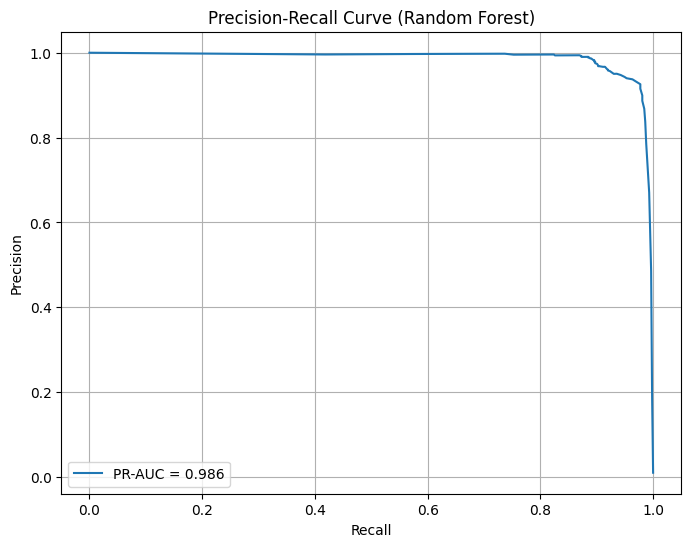

In [28]:
# PR-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_rf:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.grid()
plt.show()

#### SHAP Summary Plot

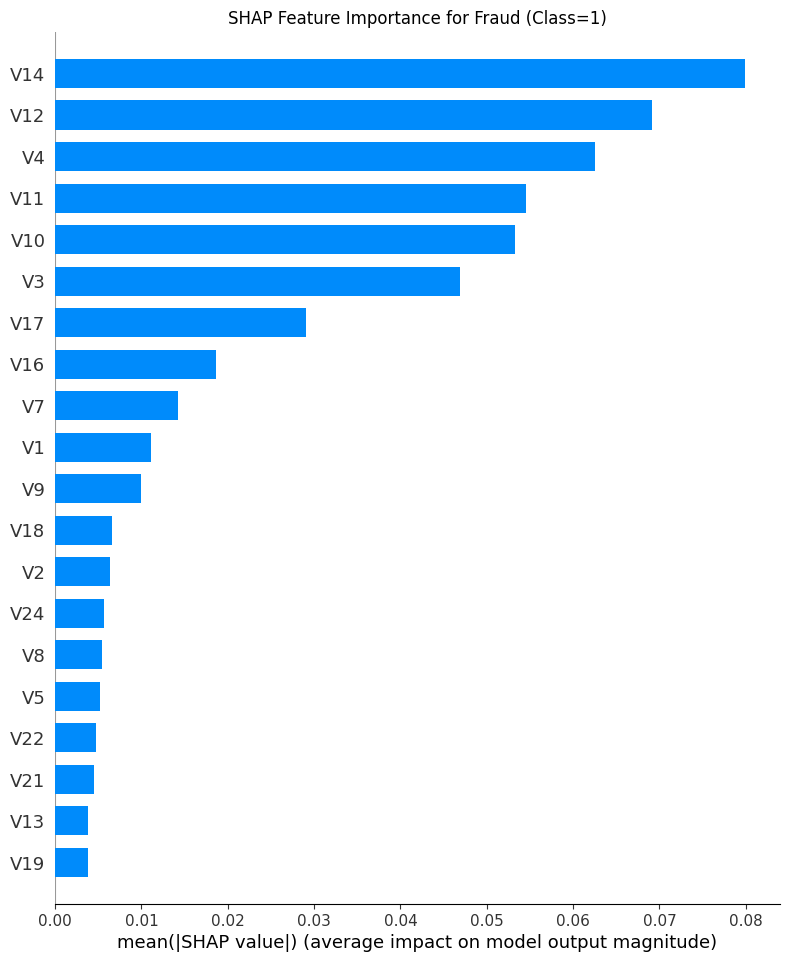

In [30]:
# SHAP Summary Plot
shap.summary_plot(shap_values[1], X_test_subset, plot_type="bar", show=False)
plt.title("SHAP Feature Importance for Fraud (Class=1)")
plt.show()

## Conclusion
The project achieved a high recall of 0.993 for fraud detection, with only 4 false negatives, making it suitable for fintech applications. SHAP was used to provide explainability by identifying key features like `V12`, `V10`, and `V14`. Future work includes integrating BERT for natural language explanations and deploying the model as an AWS API.

In [35]:
import pickle

# Save the model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)